# **Bank Customer Turnover**


## **Data Description:**
 The data contains customer information of a leading bank from European region. Data is generated for a certain duration of time regarding the customer behaviour. 
 


## **Format:**
 A data frame with 3153 observations and 14 variables. 
* **Row Number** – Serial Number
* **CustomerId**- Bank Customer Id
* **Surname**- Surname of customer 
* **Credit Score**- Integer value 
* **Geography**- Country of customer 
* **Gender**- Gender of customer 
* **Age**- Age in years 
* **Tenure**- A factor with 10 levels. 
* **Balance**- Account balance
* **Num Of Products**- How many accounts, bank account affiliated products the person has 
* **HasCrCard**- Does the customer have a credit card through the bank? 
* **IsActiveMember**- Subjective, but for the concept 
* **EstimatedSalary**- Estimated field of customer salary 
* **Exited**- Did they leave the bank after all?

## **Objective:**
Explore and manipulate the data to build a classifier model to determine whether the customer will leave or not? 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Loading training dataset.**

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Uptricks Intern/Task 1/Bank_customer.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Data Understanding**

**Contionous Variables**
* Credit score
* Age
* Balance
* EstimatedSalary

**Categorical Variable**
* Row Number
* CustomerId
* Surname
* Geography
* Gender
* Tenure
* NumofProducts
* HasCrCard
* Is ActiveMember
* Exited(Target Variable)

**Note**: Since our target variable has categorical values then the problem is Classification problem.


In [ ]:
# Shape of the dataset.
data.shape

(10000, 14)

**Observation**
* The data has 10,000 rows and 14 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.describe(include = 'object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


* **Checking for missing values.**

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Observation:**
* Data does not have any missing values.

## **Exploratory Data Anlysis**

* **Univariate Analysis**

In [ ]:
# Explore target variable.
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

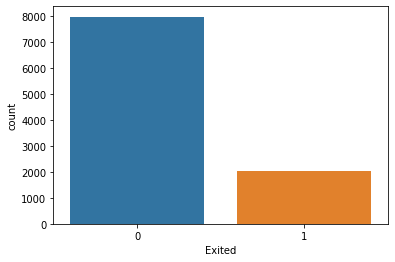

In [ ]:
sns.countplot(x = 'Exited', data = data)

Observation
* Customer who leaves bank are 2,037 while customer who does not leave are 7963 in number.
* This is an imbalanced dataset.

In [ ]:
list(data['Surname'].unique())

['Hargrave',
 'Hill',
 'Onio',
 'Boni',
 'Mitchell',
 'Chu',
 'Bartlett',
 'Obinna',
 'He',
 'H?',
 'Bearce',
 'Andrews',
 'Kay',
 'Chin',
 'Scott',
 'Goforth',
 'Romeo',
 'Henderson',
 'Muldrow',
 'Hao',
 'McDonald',
 'Dellucci',
 'Gerasimov',
 'Mosman',
 'Yen',
 'Maclean',
 'Young',
 'Nebechi',
 'McWilliams',
 'Lucciano',
 'Azikiwe',
 'Odinakachukwu',
 'Sanderson',
 'Maggard',
 'Clements',
 'Lombardo',
 'Watson',
 'Lorenzo',
 'Armstrong',
 'Cameron',
 'Hsiao',
 'Clarke',
 'Osborne',
 'Lavine',
 'Bianchi',
 'Tyler',
 'Martin',
 'Okagbue',
 'Yin',
 'Buccho',
 'Chidiebele',
 'Trevisani',
 "O'Brien",
 'Parkhill',
 'Yoo',
 'Phillipps',
 'Tsao',
 'Endrizzi',
 "T'ien",
 'Velazquez',
 'Hunter',
 'Clark',
 'Jeffrey',
 'Pirozzi',
 'Jackson',
 'Hammond',
 'Brownless',
 'Chibugo',
 'Glauert',
 'Pisano',
 'Konovalova',
 'McKee',
 'Palermo',
 'Ballard',
 'Wallace',
 'Cavenagh',
 'Hu',
 'Read',
 'Bushell',
 'Postle',
 'Buley',
 'Leonard',
 'Mills',
 'Onyeorulu',
 'Beit',
 'Ndukaku',
 'Gant',
 'Rowl

In [ ]:
print(data['Surname'].value_counts())
len(data['Surname'].value_counts())

Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Shaver        1
Reppert       1
Longstaff     1
Townsley      1
Naquin        1
Name: Surname, Length: 2932, dtype: int64


2932

Observation
* Total unique surnames are 2,932.
* The most common surnames are Smith, Scott, Martin, Walker, Brown.

In [ ]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

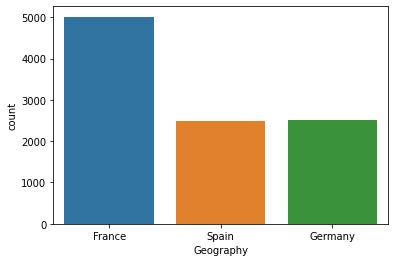

In [ ]:
sns.countplot(x = 'Geography', data = data)

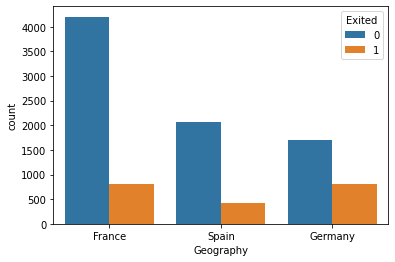

In [ ]:
sns.countplot(x = 'Geography', hue = 'Exited', data = data)

Observations:
* The customer belongs to three different location. they are France, Germany, Spain.
* Mostly customer belongs to France.
* Number of customer belongs to Spain and Germany are amlost equal.
* Mostly Customer who leaves bank are from Germany and France.

In [ ]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

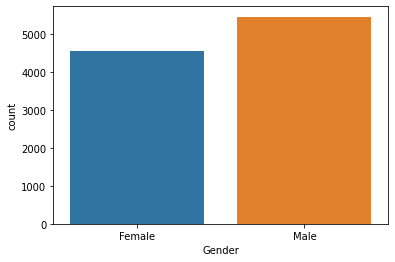

In [ ]:
sns.countplot(x = 'Gender', data = data)

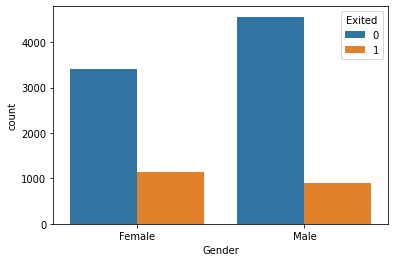

In [ ]:
sns.countplot(x = 'Gender', hue = 'Exited', data = data)

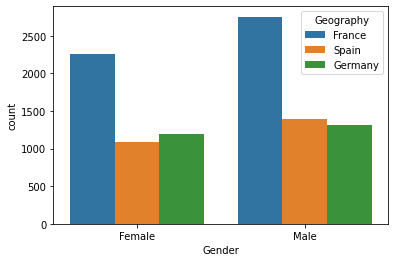

In [ ]:
sns.countplot(x = 'Gender', hue = 'Geography', data = data )

**Observation:**
* Male customer are more than the female customer.
* Female customer are more in number who leaves bank than the male customer.
* Customer belongs to France are more male than female
* If we look up female customers then female customers belongs to France are more then the customer belongs to Spain and Germany.
* If we look up male customer than customer belongs to France are more than customer belongs to Spain and France.
* Female customers belongs to Germany are little bit more than the customers belongs to Spain.
* Male customers belongs to Spain are more than the customers belongs to Germany.

* **Tenure** is the period or duration for which the loan amount is sanctioned

In [ ]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

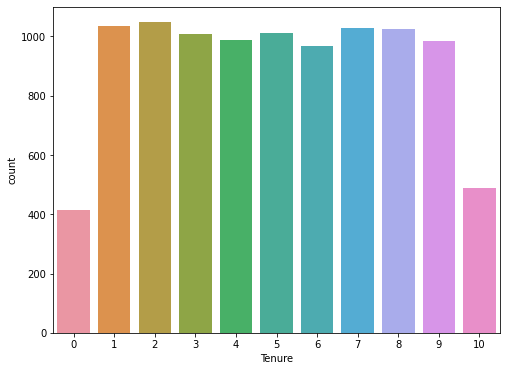

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Tenure', data = data)

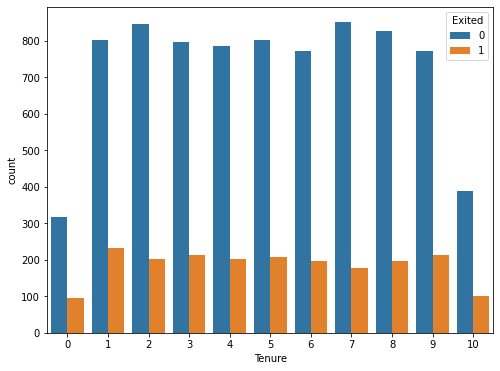

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Tenure', hue = 'Exited', data = data)

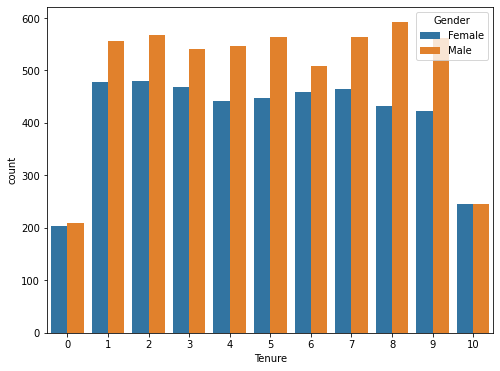

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Tenure', hue = 'Gender', data = data)

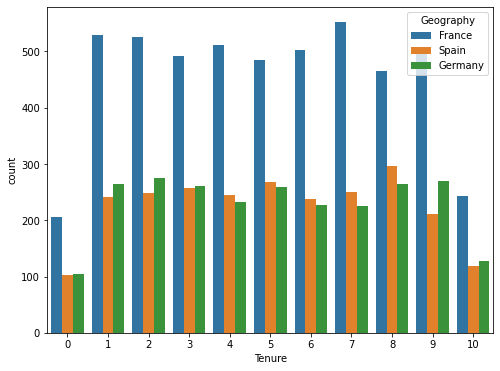

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Tenure', hue = 'Geography', data = data)

**Observations:**
* Only a few customers have received a loan of 10 years and less than 1 year
* Maximum customers has received a loan for 2 years
* Number of male customers are more than female customers who has recieved a loan.
* Number of male customers are equal to female customers who has a tenure of 10.
* There are more number of customers who has received a loan and belongs to France.



In [ ]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

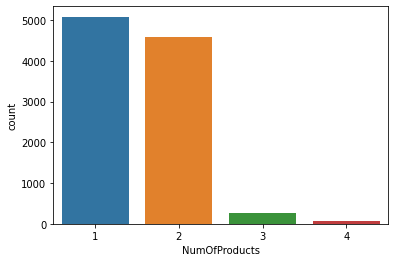

In [ ]:
sns.countplot(x = 'NumOfProducts', data = data)

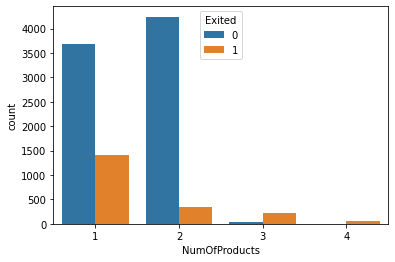

In [ ]:
sns.countplot(x = 'NumOfProducts', hue = 'Exited',data = data)

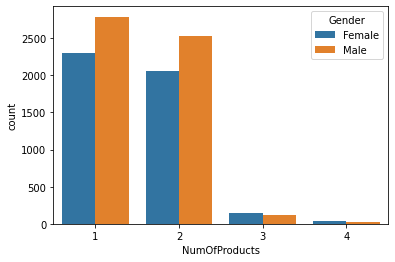

In [ ]:
sns.countplot(x = 'NumOfProducts', hue = 'Gender',data = data)

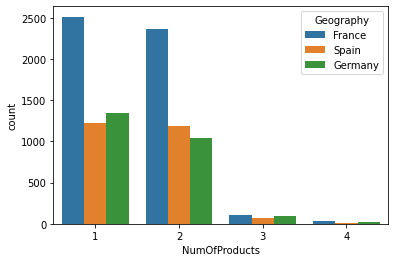

In [ ]:
sns.countplot(x = 'NumOfProducts', hue = 'Geography',data = data)

**Observation**
* Many of the customers have open accounts either 1 or 2.
* Only few of the customers have accounts more than 2.
* Customers who leaves the bank are mostly have only single counts.
* Customers who have 4 open accounts mostly all leaves the bank.
* Male customers are slightly more than female customers who have acounts either 1 or 2.
* Customers belong to France are more than others who have account 1 and 2.


In [ ]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

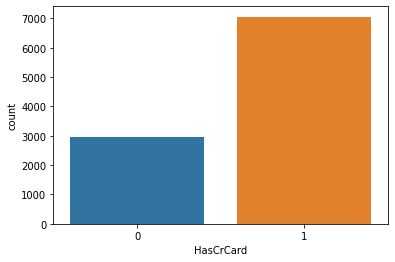

In [ ]:
sns.countplot(x = 'HasCrCard',data = data)

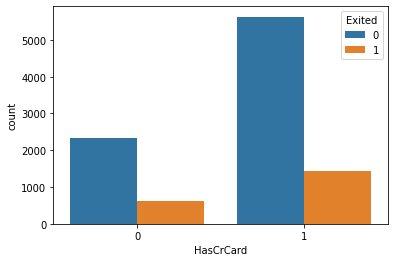

In [ ]:
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = data)

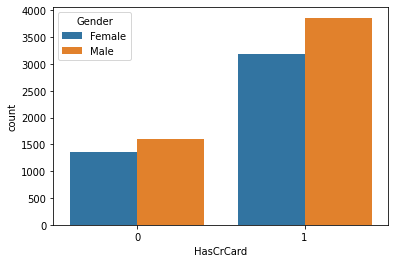

In [ ]:
sns.countplot(x = 'HasCrCard', hue = 'Gender', data = data)

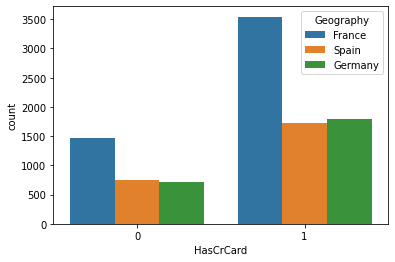

In [ ]:
sns.countplot(x = 'HasCrCard', hue = 'Geography', data = data)

**Observation**
* Mostly customers have credit card.
* Both customers having credit card and not having credit has leaves the bank.
* Male customer are more who have credit card than female customers
* France customer are more who have credit card than Spain and Germany customers.

In [ ]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

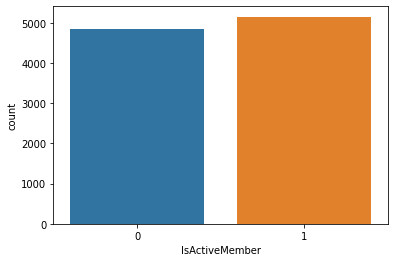

In [ ]:
sns.countplot(x = 'IsActiveMember', data = data)

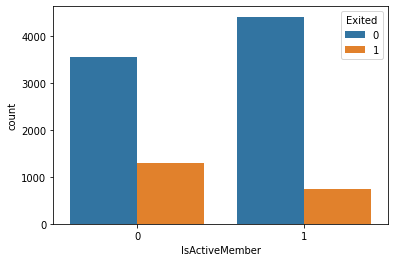

In [ ]:
sns.countplot(x = 'IsActiveMember', hue = 'Exited',data = data)

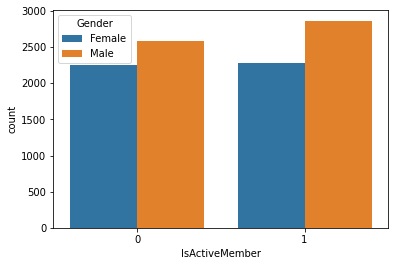

In [ ]:
sns.countplot(x = 'IsActiveMember', hue = 'Gender',data = data)

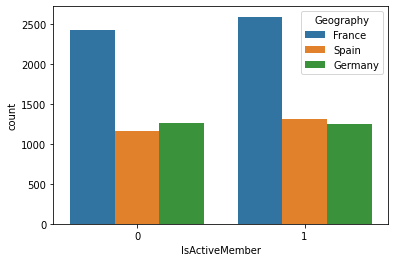

In [ ]:
sns.countplot(x = 'IsActiveMember', hue = 'Geography',data = data)

**Observation**
* Almost half of the customers are not an active member.
* Customers who are not an active memeber are leaving the bank as compared to customer who are an active member.
* Male customer are more active than female customer.
* Almost equal number of customers are active in France as compared with no active member.

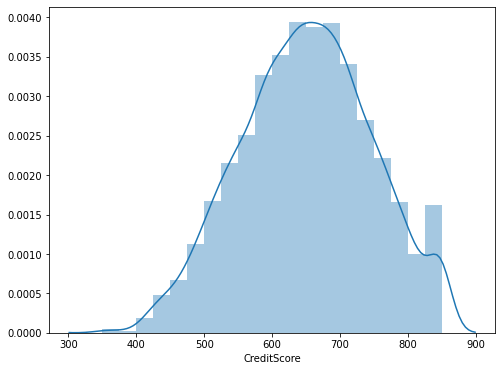

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(data['CreditScore'], hist = True, bins = 20)
plt.show()

Observation
* Credit score values are normally distributed across the whole data.
* Most customer has credit score range between 500 - 700.

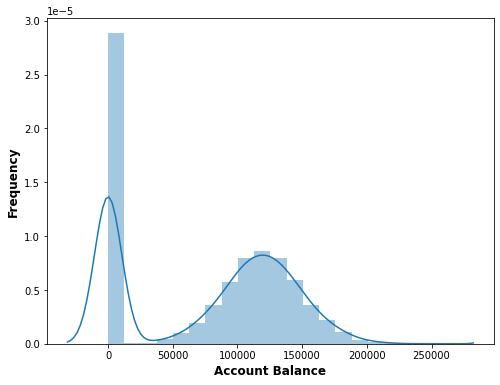

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(data['Balance'], hist = True, bins = 20)
plt.xlabel('Account Balance', fontsize = 12, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold')
plt.show()

**Observation:**
* Many of the customers have account balance 0. which seems to it can be error in a data and if it is not error then it can be concluded that the customers with zero account balance might be leaving the bank.
* This point can become our good hypothesis.
* If we remove the values of zero account balance then it is a normal distribution.

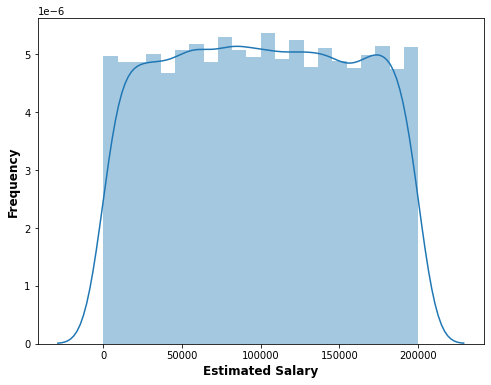

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(data['EstimatedSalary'], hist = True)
plt.xlabel('Estimated Salary', fontsize = 12, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold')
plt.show()

**Observation**
* The salary of the customers ranges between 0 to 2 lakhs.

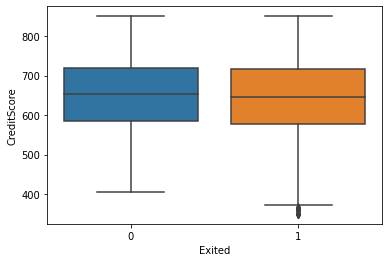

In [ ]:
sns.boxplot(x = 'Exited', y = 'CreditScore', data = data)

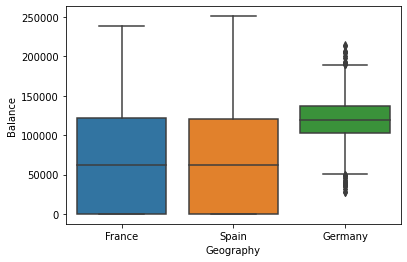

In [ ]:
sns.boxplot(x = 'Geography', y = 'Balance', data = data)

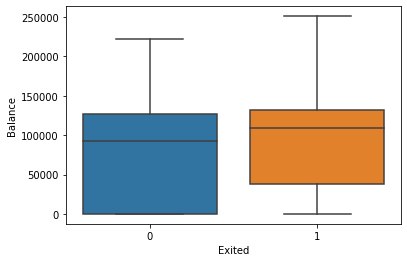

In [ ]:
sns.boxplot(x = 'Exited', y = 'Balance', data = data)

**Observation**
* Mean Credit score for type of customers who leaves bank or not are almost same.
* Customer belongs to Germany does not have zero balance.

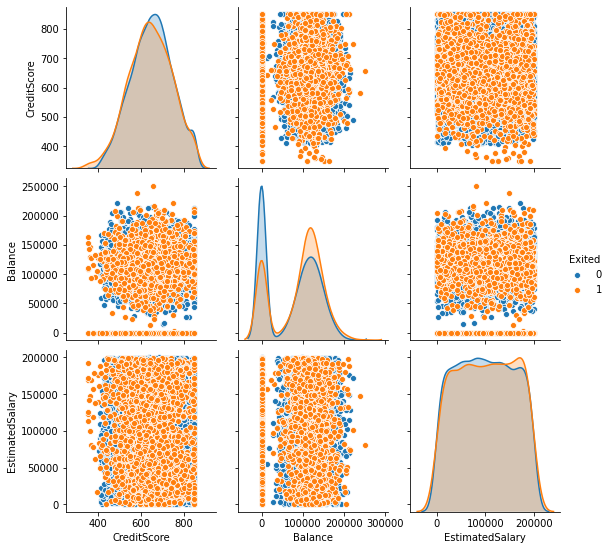

In [ ]:
df = data[['CreditScore','Balance','EstimatedSalary','Exited']]
sns.pairplot(df, hue = 'Exited',kind = 'scatter')

## **Feature Engineering**

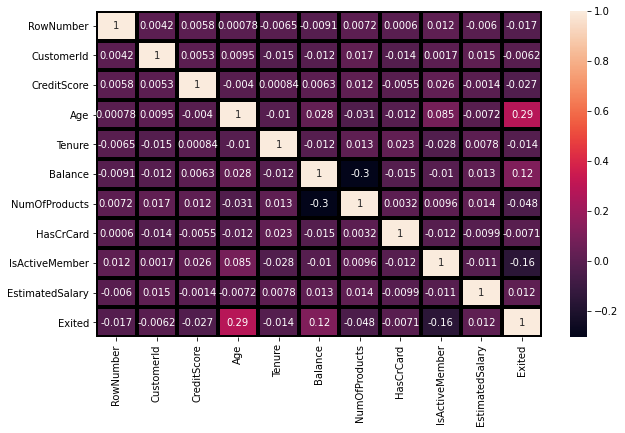

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(method = 'pearson'), annot = True, fmt = '.2g', linewidths=3, linecolor='black')

**Observation**
* Age and Balance features are corrlerated with the Exited(target variable).

Generating new features from the existing ones.
* **Credit_Sc_Tenure** is credit score for the given tenure.
* **Bal_before_Cr_sc** is the balance before credit score

In [ ]:
data['Credit_Sc_Tenure'] = data['CreditScore']*data['Tenure']
data['Bal_before_Cr_Sc'] = data['Balance'] - data['CreditScore']
data['Bal_diff'] = data['Balance'] - data['EstimatedSalary']
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_Sc_Tenure,Bal_before_Cr_Sc,Bal_diff
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1238,-619.00,-101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,608,83199.86,-28734.72
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4016,159158.80,45729.23
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,699,-699.00,-93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1700,124660.82,46426.72


###  **Handling Categorical feature**

In [ ]:
# Converting gender column
data['Gender'] = data['Gender'].replace({'Male':1,'Female':0})
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_Sc_Tenure,Bal_before_Cr_Sc,Bal_diff
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,1238,-619.00,-101348.88
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,608,83199.86,-28734.72
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,4016,159158.80,45729.23
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,699,-699.00,-93826.63
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,1700,124660.82,46426.72


**Label Encoding and One Hot Encodng**

Feature like Geography, Tenure have more than two unique values so converting these feature using encoding techniques.<br>
Now we are using one hot encoding handling these categorical features
* Creating dummy variable for the Geography and Tenure cloumns.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

variables = ['Geography','Tenure','NumOfProducts']
for i in variables:
  data[i] = le.fit_transform(data[i])

df = pd.get_dummies(data, columns = ['Geography','Tenure','NumOfProducts'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_Sc_Tenure,Bal_before_Cr_Sc,Bal_diff,Geography_0,Geography_1,Geography_2,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3
0,1,15634602,Hargrave,619,0,42,0.00,1,1,101348.88,1,1238,-619.00,-101348.88,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,2,15647311,Hill,608,0,41,83807.86,0,1,112542.58,0,608,83199.86,-28734.72,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,15619304,Onio,502,0,42,159660.80,1,0,113931.57,1,4016,159158.80,45729.23,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,15701354,Boni,699,0,39,0.00,0,0,93826.63,0,699,-699.00,-93826.63,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,15737888,Mitchell,850,0,43,125510.82,1,1,79084.10,0,1700,124660.82,46426.72,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Removing the column named as RowNumber
df.drop(columns = 'RowNumber',inplace = True)
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_Sc_Tenure,Bal_before_Cr_Sc,Bal_diff,Geography_0,Geography_1,Geography_2,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3
0,15634602,Hargrave,619,0,42,0.00,1,1,101348.88,1,1238,-619.00,-101348.88,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,15647311,Hill,608,0,41,83807.86,0,1,112542.58,0,608,83199.86,-28734.72,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15619304,Onio,502,0,42,159660.80,1,0,113931.57,1,4016,159158.80,45729.23,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,15701354,Boni,699,0,39,0.00,0,0,93826.63,0,699,-699.00,-93826.63,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,15737888,Mitchell,850,0,43,125510.82,1,1,79084.10,0,1700,124660.82,46426.72,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# set index as CustomerId and Surname.
df.set_index(['CustomerId','Surname'],inplace = True)
df.head()

,,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_Sc_Tenure,Bal_before_Cr_Sc,Bal_diff,Geography_0,Geography_1,Geography_2,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3
CustomerId,Surname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15634602,Hargrave,619,0,42,0.00,1,1,101348.88,1,1238,-619.00,-101348.88,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
15647311,Hill,608,0,41,83807.86,0,1,112542.58,0,608,83199.86,-28734.72,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
15619304,Onio,502,0,42,159660.80,1,0,113931.57,1,4016,159158.80,45729.23,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
15701354,Boni,699,0,39,0.00,0,0,93826.63,0,699,-699.00,-93826.63,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
15737888,Mitchell,850,0,43,125510.82,1,1,79084.10,0,1700,124660.82,46426.72,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (15634602, 'Hargrave') to (15628319, 'Walker')
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       10000 non-null  int64  
 1   Gender            10000 non-null  int64  
 2   Age               10000 non-null  int64  
 3   Balance           10000 non-null  float64
 4   HasCrCard         10000 non-null  int64  
 5   IsActiveMember    10000 non-null  int64  
 6   EstimatedSalary   10000 non-null  float64
 7   Exited            10000 non-null  int64  
 8   Credit_Sc_Tenure  10000 non-null  int64  
 9   Bal_before_Cr_Sc  10000 non-null  float64
 10  Bal_diff          10000 non-null  float64
 11  Geography_0       10000 non-null  uint8  
 12  Geography_1       10000 non-null  uint8  
 13  Geography_2       10000 non-null  uint8  
 14  Tenure_0          10000 non-null  uint8  
 15  Tenure_1          10000 non-null  uint8  
 16  Tenu

## **Model Building**

In [ ]:
# Separating independent and target variable
X = df.drop(columns = 'Exited')
Y = df['Exited']
print(X.head())
print(Y.head())

                     CreditScore  Gender  ...  NumOfProducts_2  NumOfProducts_3
CustomerId Surname                        ...                                  
15634602   Hargrave          619       0  ...                0                0
15647311   Hill              608       0  ...                0                0
15619304   Onio              502       0  ...                1                0
15701354   Boni              699       0  ...                0                0
15737888   Mitchell          850       0  ...                0                0

[5 rows x 28 columns]
CustomerId  Surname 
15634602    Hargrave    1
15647311    Hill        0
15619304    Onio        1
15701354    Boni        0
15737888    Mitchell    0
Name: Exited, dtype: int64


* **Divide the data into train and test dataset**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Decision Tree Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'], 'max_depth':[4,6,8,10,12], 'splitter':['best','random']}
dt_clf = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(estimator=dt_clf, param_grid = parameters, cv = 4, n_jobs=-1)
grid.fit(X_train, y_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

 The best score across ALL searched params:
 0.8498749999999999

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}



In [ ]:
# Fitting Decision tree algorithm
from sklearn.metrics import f1_score
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='random',random_state=42)

# Fitting the model
dt_clf.fit(X_train_scaled,y_train)
# Predicting values
y_pred_dt = dt_clf.predict(X_test_scaled)

print('Training Score:', dt_clf.score(X_train_scaled,y_train))
print('Test Score:', dt_clf.score(X_test_scaled,y_test))
acc_score_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy Score:', acc_score_dt)

auc_score_dt = roc_auc_score(y_test,y_pred_dt)
print('Roc Auc Score:', auc_score_dt)

Training Score: 0.856875
Test Score: 0.8575
Accuracy Score: 0.8575
Accuracy Score: 0.733809357947289


## **RandomForest Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[20,50,100,200],'criterion':['gini','entropy'], 'max_depth':[4,6,8,10,12]}
rf_clf = RandomForestClassifier(random_state=67)
grid = GridSearchCV(estimator=rf_clf, param_grid = parameters, cv = 4, n_jobs=-1)
grid.fit(X_train, y_train)

#rf_clf.fit(X_train,y_train)
#score = rf_clf.score(X_test,y_test)
#y_pred = rf_clf.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
#auc_score = roc_auc_score(y_test,y_pred)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=67, verbose=0,
                       warm_start=False)

 The best score across ALL searched params:
 0.864375

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}



In [ ]:
# Training a model using Random Forest Classifier with best parameters.
rf_clf = RandomForestClassifier(n_estimators = 100,max_depth = 14,criterion = 'gini',random_state=67)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)

print('Training Score:', rf_clf.score(X_train_scaled,y_train))
print('Test Score:', rf_clf.score(X_test_scaled,y_test))
acc_score_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy Score:', acc_score_rf)

auc_score_rf = roc_auc_score(y_test,y_pred_rf)
print('Accuracy Score:', auc_score_rf)

Training Score: 0.95075
Test Score: 0.8735
Accuracy Score: 0.8735
Accuracy Score: 0.7383141762452108


## **Gradient Boosted Decision Tree**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

for this_alpha in [0.01,0.1,1,10,100]:
   gb_clf = GradientBoostingClassifier(learning_rate =this_alpha, n_estimators = 100, max_depth = 10, random_state = 42)
   gb_clf.fit(X_train,y_train)

   y_pred_gb = gb_clf.predict(X_test)
   
   print('For alpha:', this_alpha)
   print('Train score:',gb_clf.score(X_train,y_train))
   print('Test score:',gb_clf.score(X_test,y_test))
   accuracy = accuracy_score(y_test,y_pred_gb)
   print('Accuracy score: ',accuracy)
   print('\n')

For alpha: 0.01
Train score: 0.91175
Test score: 0.856
Accuracy score:  0.856


For alpha: 0.1
Train score: 1.0
Test score: 0.8545
Accuracy score:  0.8545


For alpha: 1
Train score: 1.0
Test score: 0.832
Accuracy score:  0.832


For alpha: 10
Train score: 0.616375
Test score: 0.6365
Accuracy score:  0.6365


For alpha: 100
Train score: 0.480125
Test score: 0.487
Accuracy score:  0.487




In [ ]:
gb_clf = GradientBoostingClassifier(learning_rate = 0.01, n_estimators=100,max_depth = 10,random_state = 67)
gb_clf.fit(X_train_scaled,y_train)
y_pred_gb = gb_clf.predict(X_test_scaled)

print('Train score:',gb_clf.score(X_train_scaled,y_train))
print('Test score:',gb_clf.score(X_test_scaled,y_test))
acc_score_gb = accuracy_score(y_test,y_pred_gb)
print('Accuracy score: ',acc_score_gb)

auc_score_gb = roc_auc_score(y_test,y_pred_gb)
print('Accuracy Score:', auc_score_gb)

Train score: 0.911375
Test score: 0.857
Accuracy score:  0.857
Accuracy Score: 0.7003367003367004


**Observation:**
Learning rate alpha = 0.01 is the best fit for the model.

## **Support vector Machines**

In [ ]:
from sklearn.svm import SVC

for this_c in [0.01,0.1,1,10]:
   svc_clf = SVC(kernel ='linear', C=this_c, random_state = 67,)
   svc_clf.fit(X_train_scaled,y_train)
   y_pred_svc = svc_clf.predict(X_test_scaled)

   print('For C = ', this_c)
   print('Train score:',svc_clf.score(X_train_scaled,y_train))
   print('Test score:',svc_clf.score(X_test_scaled,y_test))
   accuracy = accuracy_score(y_test,y_pred_svc)
   print('Accuracy score: ',accuracy)

For C =  0.01
Train score: 0.819125
Test score: 0.822
Accuracy score:  0.822
For C =  0.1
Train score: 0.819125
Test score: 0.822
Accuracy score:  0.822
For C =  1
Train score: 0.819125
Test score: 0.822
Accuracy score:  0.822
For C =  10
Train score: 0.819125
Test score: 0.822
Accuracy score:  0.822


In [ ]:
svc_clf = SVC(kernel ='rbf', C=10, random_state = 67)
svc_clf.fit(X_train_scaled,y_train)
y_pred_svc = svc_clf.predict(X_test_scaled)
print('Train score:',svc_clf.score(X_train_scaled,y_train))
print('Test score:',svc_clf.score(X_test_scaled,y_test))
acc_score_svc = accuracy_score(y_test,y_pred_svc)
print('Accuracy score: ',acc_score_svc)

auc_score_svc = roc_auc_score(y_test,y_pred_svc)
print('Roc Auc Score:', auc_score_svc)


Train score: 0.900375
Test score: 0.858
Accuracy score:  0.858
Roc Auc Score: 0.7276752196292426


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled,y_train)
y_pred_nb = nb_clf.predict(X_test_scaled)


print('Train score:',nb_clf.score(X_train_scaled,y_train))
print('Test score:',nb_clf.score(X_test_scaled,y_test))
acc_score_nb = accuracy_score(y_test,y_pred_svc)
print('Accuracy score: ',acc_score_nb)

auc_score_nb = roc_auc_score(y_test,y_pred_nb)
print('Roc Auc Score:', auc_score_nb)


Train score: 0.819125
Test score: 0.822
Accuracy score:  0.858
Roc Auc Score: 0.5697047099345949


## **Model Selection And Evaluation**

In [ ]:
score = pd.DataFrame({'Training Score': [dt_clf.score(X_train_scaled,y_train), rf_clf.score(X_train_scaled,y_train),
                                         gb_clf.score(X_train_scaled,y_train),svc_clf.score(X_train_scaled,y_train),nb_clf.score(X_train_scaled,y_train)], 
                      'Test Score':[dt_clf.score(X_test_scaled,y_test), rf_clf.score(X_test_scaled,y_test),
                                         gb_clf.score(X_test_scaled,y_test),svc_clf.score(X_test_scaled,y_test),nb_clf.score(X_test_scaled,y_test)],
                      'Accuracy Score':[acc_score_dt,acc_score_rf,acc_score_gb,acc_score_svc,acc_score_nb],
                      'Roc_auc_score': [auc_score_dt,auc_score_rf,auc_score_gb,auc_score_svc,auc_score_nb]}, 
                     index = ['Decision Tree','Random Forest Regressor','Gradient Boosting Decision Tree','SVM','Naive Bayes'])
score

,Training Score,Test Score,Accuracy Score,Roc_auc_score
Decision Tree,0.856875,0.8575,0.8575,0.733809
Random Forest Regressor,0.950750,0.8735,0.8735,0.738314
Gradient Boosting Decision Tree,0.911375,0.8570,0.8570,0.700337
SVM,0.900375,0.8580,0.8580,0.727675
Naive Bayes,0.819125,0.8220,0.8580,0.569705


**Observation:**
* By analysing the performance of the different model. Random Forest model is the suited be the best generalized model.

# **Final Model: Random Forest Model**

In [ ]:
# Training a model using Random Forest Classifier with best parameters.
def model(X_train_scaled,y_train,X_test_scaled,X_test):
  rf_clf = RandomForestClassifier(n_estimators = 100,max_depth = 14,criterion = 'gini',random_state=67)
  rf_clf.fit(X_train_scaled, y_train)
  y_pred_rf = rf_clf.predict(X_test_scaled)

  print('Training Score:', rf_clf.score(X_train_scaled,y_train))
  print('Test Score:', rf_clf.score(X_test_scaled,y_test))
  acc_score_rf = accuracy_score(y_test,y_pred_rf)
  print('Accuracy Score:', acc_score_rf)

  auc_score_rf = roc_auc_score(y_test,y_pred_rf)
  print('Accuracy Score:', auc_score_rf)
  return y_pred_rf


In [ ]:
model(X_train_scaled,y_train,X_test_scaled,X_test)

Training Score: 0.95075
Test Score: 0.8735
Accuracy Score: 0.8735
Accuracy Score: 0.7383141762452108


array([0, 0, 0, ..., 0, 0, 0])

## **Plot True label vs Predicted label**

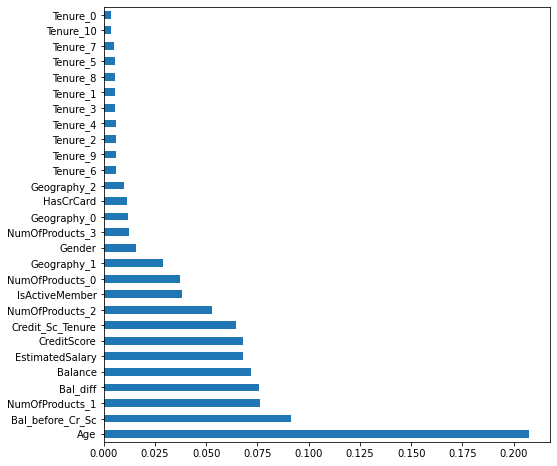

In [ ]:
feat_importances = pd.Series(rf_clf.feature_importances_, index= X.columns)
plt.figure(figsize=(8,8))
feat_importances.nlargest(28).plot(kind='barh')

# Top 10 most important features useful for predicting whether the customer will leave bank or not are
* Age
* Bal_before_Cr_Score(Balance before tthe credit score.)
* NumOfProducts_1(Customers who have 2 accounts)
* Bal_diff
* Balance
* Estimated Salary
* Credit Score
* Credit_Sc_Tenure
* NumOfProducts_2(Customers who have 3 accounts)
* IsActiveMember
* NumOfProducts_0(Customers who have 1 accounts)